<a href="https://colab.research.google.com/github/sejallotliker/Machine_learning_practice/blob/main/Supermarker_sales_dataset_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/JNCASR/Sem-4/Intro_to_ML/My_practice_ML/supermarket_sales.csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [ ]:
df.shape

(1000, 17)

In [ ]:
#There are 1000 rows and 17 columns

In [ ]:
df.isnull().sum()

,0
Invoice ID,0
Branch,0
City,0
Customer type,0
Gender,0
Product line,0
Unit price,0
Quantity,0
Tax 5%,0
Total,0


In [ ]:
#there are no null values in the data

In [ ]:
#To select features and target column
y = df['gross income']
x = df[['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Unit price', 'Quantity', 'Rating' ]]

#df = pd.concat([x,y], axis=1)
#df.head()

In [ ]:
df['City'].value_counts()

,count
City,
Yangon,340
Mandalay,332
Naypyitaw,328


In [ ]:
#To split the data into train and test:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [ ]:
#To make pipeline:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Selecting numerical and categorical features based on x_train
numerical_data = x_train.select_dtypes(exclude='object').columns
categorical_data = x_train.select_dtypes(include='object').columns

numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler(feature_range=(-1, 1)))
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

Preprocessor = ColumnTransformer([
    ('numerical', numerical_pipeline, numerical_data),
    ('categorical', categorical_pipeline, categorical_data)
])

X_preprocessed = Preprocessor.fit_transform(x_train)

In [ ]:
from sklearn.linear_model import LinearRegression
Full_pipeline = Pipeline([
    ('Preprocessor', Preprocessor),
    ('model', LinearRegression())
])

In [ ]:
Full_pipeline.fit(x_train, y_train)

Pipeline(steps=[('Preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler(feature_range=(-1,
                                                                                               1)))]),
                                                  Index(['Unit price', 'Quantity', 'Rating'], dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Branch', 'City', 'Customer type', 'Gender', 'Product line'], dtype='object'))])),
                ('model', LinearRegression())])

In [ ]:
y_pred = Full_pipeline.predict(x_test)

In [ ]:
dict = {'y_test': y_test, 'y_pred': y_pred}
df_y = pd.DataFrame(dict)
df_y.reset_index(drop=True, inplace=True)
df_y.head()

,y_test,y_pred
0,24.9510,24.797227
1,29.3800,28.376299
2,19.4635,19.619097
3,6.4455,4.347222
4,2.1870,-4.217413


In [ ]:
#Model accuracy:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9023002752108369

In [ ]:
#RMSE:
from sklearn.metrics import root_mean_squared_error
rmse = root_mean_squared_error(y_test, y_pred)
print(rmse)

3.7964797557845222


In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae}")

MAE: 2.8191747093432933


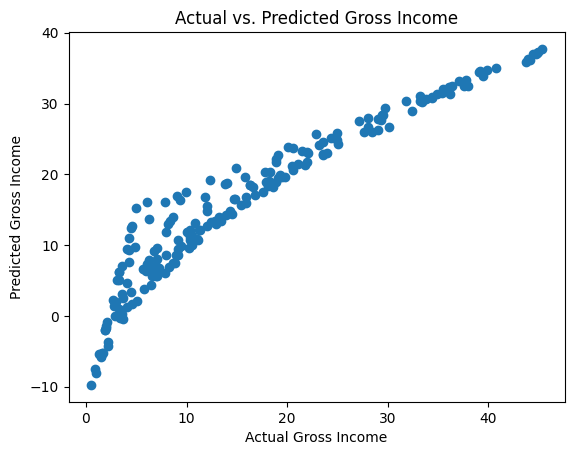

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Gross Income")
plt.ylabel("Predicted Gross Income")
plt.title("Actual vs. Predicted Gross Income")
plt.show()